In [2]:
import datetime
import pandas as pd

Get the current time

In [3]:
def get_time():
    current_time = datetime.datetime.now()

    return [current_time.hour, current_time.minute]

get_time()

[10, 37]

Convert to Fibonary

1,1,2,3,5,8,13,21,34,55

In [4]:
# Define the Fibonacci sequence
fibonacci_all = [1, 1]
while fibonacci_all[-1] < 34:
    fibonacci_all.append(fibonacci_all[-1] + fibonacci_all[-2])

fibonacci = fibonacci_all[1:]

In [5]:
def decimal_to_fibonary(decimal_num):
    # Convert the decimal number to modified Fibonacci binary
    fibonary = ""
    for num in reversed(fibonacci):
        if decimal_num >= num:
            fibonary += '1'
            decimal_num -= num
        else:
            fibonary += '0'
    
    # Pad the modified Fibonacci fibonary number to 8 digits
    fibonary = "{:0>8}".format(fibonary)
    
    return fibonary

# Example usage of the function
decimal_num = 20
fibonary = decimal_to_fibonary(decimal_num)
print("The modified Fibonacci binary representation of {} is: {}".format(decimal_num, fibonary))


The modified Fibonacci binary representation of 20 is: 00101010


In [6]:
numbers = list(range(60))

# Apply the decimal_to_modified_fibonacci function to each number and store the result in a list
fibonary_list = [decimal_to_fibonary(num) for num in numbers]

# Create a pandas DataFrame with the two columns
df = pd.DataFrame({'Fibonary': fibonary_list})

# Display the DataFrame
print(df)

    Fibonary
0   00000000
1   00000001
2   00000010
3   00000100
4   00000101
5   00001000
6   00001001
7   00001010
8   00010000
9   00010001
10  00010010
11  00010100
12  00010101
13  00100000
14  00100001
15  00100010
16  00100100
17  00100101
18  00101000
19  00101001
20  00101010
21  01000000
22  01000001
23  01000010
24  01000100
25  01000101
26  01001000
27  01001001
28  01001010
29  01010000
30  01010001
31  01010010
32  01010100
33  01010101
34  10000000
35  10000001
36  10000010
37  10000100
38  10000101
39  10001000
40  10001001
41  10001010
42  10010000
43  10010001
44  10010010
45  10010100
46  10010101
47  10100000
48  10100001
49  10100010
50  10100100
51  10100101
52  10101000
53  10101001
54  10101010
55  11000000
56  11000001
57  11000010
58  11000100
59  11000101


Determine which quadrants need to be lit up

In [7]:
def get_fibonary_time():
    [current_hour, current_minute] = get_time()
    return {
        'quadrant': fibonacci,
        'hours': list(reversed(decimal_to_fibonary(current_hour))),
        'minutes': list(reversed(decimal_to_fibonary(current_minute))),
    }
    
quadrants = get_fibonary_time()
quadrants

{'quadrant': [1, 2, 3, 5, 8, 13, 21, 34],
 'hours': ['0', '1', '0', '0', '1', '0', '0', '0'],
 'minutes': ['0', '0', '1', '0', '0', '0', '0', '1']}

Draw it up

In [8]:
quadrant_coords = [
    [21+8+1, 13+2],
    [21+8, 13+2],
    [21+8, 13],
    [21+8+2, 13],
    [21+8, 13+3],
    [21, 13],
    [21, 0],
    [21+13, 0],
    [21, 21],
]

# flip y axis
quadrant_coords_min = quadrant_coords[:]
for i in range(len(quadrant_coords_min)):
    quadrant_coords_min[i] = [quadrant_coords_min[i][0], 55-fibonacci_all[i]-quadrant_coords_min[i][1]]

minutes_config = {
    'coords': quadrant_coords_min,
    'colour': ['blue', 'blue', 'red', 'yellow', 'white', 'yellow', 'blue', 'red', 'blue']
}

# switch x and y, then flip y axis
quadrant_coords_h = quadrant_coords[:]
for i in range(len(quadrant_coords_h)):
    # quadrant_coords_h[i] = list(reversed(quadrant_coords_h[i]))
    quadrant_coords_h[i] = [quadrant_coords_h[i][1], 55-fibonacci_all[i]-quadrant_coords_h[i][0]]

hours_config = {
    'coords': quadrant_coords_h[:-1],
    'colour': ['white', 'white', 'yellow', 'blue', 'red', 'white', 'red', 'yellow']
}

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [10]:
def draw_square(size, color, x_start, y_start):
    square = plt.Rectangle((x_start, y_start), size, size, linewidth=2, edgecolor='black', facecolor=color)
    ax.add_artist(rect)


Hours 01001000
Minutes 10100001


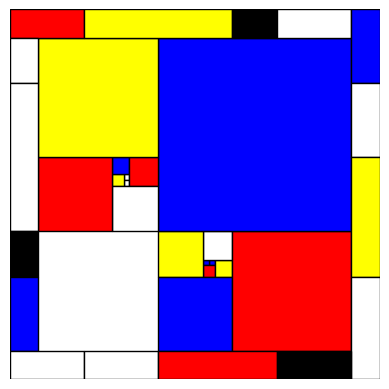

In [12]:
import matplotlib.pyplot as plt

canvas_size = 55
border_size = 5
colour_all_quadrants = True
# colour_all_quadrants = False

# create figure with one subplot
fig, ax = plt.subplots()

# set aspect ratio to square and turn off axes
ax.set_aspect('equal', 'box')
ax.axis('off')

def draw_rect(width, height, x, y, color):
    rect = plt.Rectangle((x, y), width, height, linewidth=1,
                           edgecolor='black', facecolor=color)
    ax.add_artist(rect)

quadrants = get_fibonary_time()

print('Hours ' + "".join(quadrants['hours']))
print('Minutes ' + "".join(quadrants['minutes']))

adjust_x = 0
adjust_y = 0
# draw minutes
for index in range(len(minutes_config['coords'])):
    x, y = minutes_config['coords'][index]
    active = quadrants['minutes'][index] if index == 0 else quadrants['minutes'][index-1]
    draw_rect(fibonacci_all[index], fibonacci_all[index], x + adjust_x, y + adjust_y, minutes_config['colour'][index] if active == '0' or colour_all_quadrants else 'white')
    
# draw hours
for index in range(len(hours_config['coords'])):
    x, y = hours_config['coords'][index]
    active = quadrants['hours'][index] if index == 0 else quadrants['hours'][index-1]
    draw_rect(fibonacci_all[index], fibonacci_all[index], x + adjust_x, y + adjust_y, hours_config['colour'][index] if active == '0' or colour_all_quadrants else 'white')
    
# draw rest of picture
# draw_rect(21,21,0,0,'white')
# # bottom
draw_rect(border_size+8,border_size,-border_size,-border_size,'red')
draw_rect(13+13,border_size,8,-border_size,'yellow')
draw_rect(8,border_size,13+13+8,-border_size,'black')
draw_rect(13,border_size,13+13+8+8,-border_size,'white')
# right
draw_rect(border_size,border_size+8,canvas_size,-border_size,'blue')
draw_rect(border_size,13,canvas_size,8,'white')
draw_rect(border_size,21,canvas_size,8+13,'yellow')
draw_rect(border_size,13+border_size,canvas_size,8+13+21,'white')
# left
draw_rect(border_size,8,-border_size,0,'white')
draw_rect(border_size,13+13,-border_size,8,'white')
draw_rect(border_size,8,-border_size,8+13+13,'black')
draw_rect(border_size,13,-border_size,8+13+13+8,'blue')
# top
draw_rect(border_size+8,border_size,-border_size,canvas_size,'white')
draw_rect(13,border_size,8,canvas_size,'white')
draw_rect(21,border_size,8+13,canvas_size,'red')
draw_rect(13,border_size,8+13+21,canvas_size,'black')

# adjust x and y limits to zoom out
ax.set_xlim([-border_size, canvas_size + border_size])
ax.set_ylim([-border_size, canvas_size + border_size])
# ax.set_xlim([0, canvas_size])
# ax.set_ylim([0, canvas_size])

ax.invert_yaxis()

# display the plot
plt.show()
